## Content

This notebook presents an exploratory analysis of worldwide natural disaster events recorded between 2023 and 2025. The dataset captures key attributes such as disaster type, geographic location, severity level, number of affected individuals, estimated economic losses, and emergency response timing. Through structured exploratory data analysis (EDA) and visualizations, the notebook aims to identify relevant patterns, trends, and associations across different categories of natural disasters.

## Context and Motivation

Natural disasters pose significant economic and social challenges at a global scale, affecting governments, humanitarian organizations, and policymakers alike. Understanding how these events are distributed over time and across regions, as well as the magnitude of their impacts, is essential for improving disaster preparedness, emergency response planning, and risk mitigation strategies. In this context, data-driven insights play a critical role in highlighting vulnerable areas and supporting more informed resource allocation.

This analysis focuses on exploring the following questions:

* Whether different types of natural disasters tend to coexist within the same temporal or geographic contexts;

* How seasonal patterns relate to the occurrence of these events;

* Whether certain countries, due to their geographic location, tend to experience a higher frequency of natural disasters (for example, countries such as the Philippines, located along the Pacific Ring of Fire);

* Which countries experience the greatest economic and social impacts associated with natural disasters.

Rather than analyzing disaster events in isolation, this study adopts a holistic exploratory approach to uncover broader patterns in their occurrence and impact. By examining temporal, geographic, and categorical dimensions simultaneously, the analysis seeks to reveal trends of coexistence, seasonality, and regional concentration that may not be immediately evident from individual records.

The findings of this exploratory analysis are intended to serve as an analytical foundation for subsequent decision-making processes, such as strategic planning, prioritization of resources, or the development of more advanced analytical models. At the same time, the study acknowledges the inherent limitations of exploratory data analysis and the scope of the available dataset, avoiding causal interpretations and focusing instead on observable associations and distributions.

### 1. Inicialization

In [290]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [291]:
data = pd.read_csv('synthetic_disaster_events_2025.csv')
display(data.sample(5))

paises = pd.read_csv('pais_km2_pop.csv')
display(paises)

estaciones = pd.read_csv('season.csv')
display(estaciones.head(5))


,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
13003,13004,Earthquake,Philippines,16.259127,123.208100,2024-11-19,2,14735,1498232.05,65.25,Yes,0.55,0
2467,2468,Hurricane,Philippines,15.782033,124.142470,2025-08-11,5,20099,4252308.84,58.72,Yes,0.76,0
15011,15012,Volcanic Eruption,USA,38.687335,-95.857162,2024-11-19,1,8313,523116.96,50.91,Yes,0.11,0
3248,3249,Landslide,Philippines,13.437037,123.820020,2025-05-01,3,17058,3522968.05,33.36,Yes,0.40,0
12328,12329,Flood,USA,37.515769,-97.965865,2024-07-26,3,17760,4623320.65,8.85,No,0.33,0


,location,km2,population
0,Chile,756096,19603700
1,India,3287263,1428627663
2,Italy,301340,58853482
3,Turkey,783562,85739100
4,Indonesia,1904569,279798049
5,Japan,377975,123294513
6,USA,9833517,339996570
7,Philippines,300000,117337370


,location,month,month_name,season
0,Chile,1,enero,Summer
1,Chile,2,febrero,Summer
2,Chile,3,marzo,Autumn
3,Chile,4,abril,Autumn
4,Chile,5,mayo,Autumn


### 2. Preparing the data for analysis

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   event_id                     20000 non-null  int64  
 1   disaster_type                20000 non-null  object 
 2   location                     20000 non-null  object 
 3   latitude                     20000 non-null  float64
 4   longitude                    20000 non-null  float64
 5   date                         20000 non-null  object 
 6   severity_level               20000 non-null  int64  
 7   affected_population          20000 non-null  int64  
 8   estimated_economic_loss_usd  20000 non-null  float64
 9   response_time_hours          20000 non-null  float64
 10  aid_provided                 20000 non-null  object 
 11  infrastructure_damage_index  20000 non-null  float64
 12  is_major_disaster            20000 non-null  int64  
dtypes: float64(5), i

In [293]:
print('Amount of duplicates:', data.duplicated().sum())
print('Amount of null values:')
print(data.isna().sum())


Amount of duplicates: 0
Amount of null values:
event_id                       0
disaster_type                  0
location                       0
latitude                       0
longitude                      0
date                           0
severity_level                 0
affected_population            0
estimated_economic_loss_usd    0
response_time_hours            0
aid_provided                   0
infrastructure_damage_index    0
is_major_disaster              0
dtype: int64


In [294]:
#convert date column to datetime
data['date'] = pd.to_datetime(data['date'])

#creo columnas: semana, mes y año
data['week'] = data['date'].dt.isocalendar().week
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.isocalendar().year

In [295]:
#reorganize columns

data_clean = data.iloc[:, [0, 1, 2, 3, 4, 5, 13, 14, 15, 6, 7, 8, 9, 10, 11, 12]]

In [296]:
display(data_clean.sample(5))

,event_id,disaster_type,location,latitude,longitude,date,week,month,year,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
8181,8182,Wildfire,Indonesia,-0.998165,109.641166,2025-12-04,49,12,2025,9,49550,7206292.83,39.92,Yes,0.92,1
7448,7449,Drought,Italy,36.271153,11.277184,2022-12-08,49,12,2022,2,18357,5191623.57,41.48,Yes,0.29,0
6083,6084,Earthquake,Indonesia,-1.641825,112.372015,2024-08-27,35,8,2024,3,10953,1007203.21,42.45,No,0.31,0
9637,9638,Landslide,Japan,36.810408,136.815654,2024-03-19,12,3,2024,3,20144,4193420.90,48.76,No,0.39,0
3759,3760,Flood,India,18.176135,80.300872,2023-02-07,6,2,2023,5,16838,1057138.44,18.94,Yes,0.85,0


### EDA

In [297]:
#Obervamos fechas de comienzo y finalización de los registros
print('Start date:', data_clean['date'].min())
print('End date:', data_clean['date'].max())
print("")

#Tipo de eventos registrados
print('Kind of events registered:', data_clean['disaster_type'].unique())
print("")

#paises de donde se obtienen estos registros
print('Countries affected:', data_clean['location'].unique())

Start date: 2022-12-08 00:00:00
End date: 2025-12-07 00:00:00

Kind of events registered: ['Wildfire' 'Hurricane' 'Volcanic Eruption' 'Drought' 'Landslide'
 'Earthquake' 'Flood']

Countries affected: ['Chile' 'India' 'Italy' 'Turkey' 'Indonesia' 'Japan' 'USA' 'Philippines']


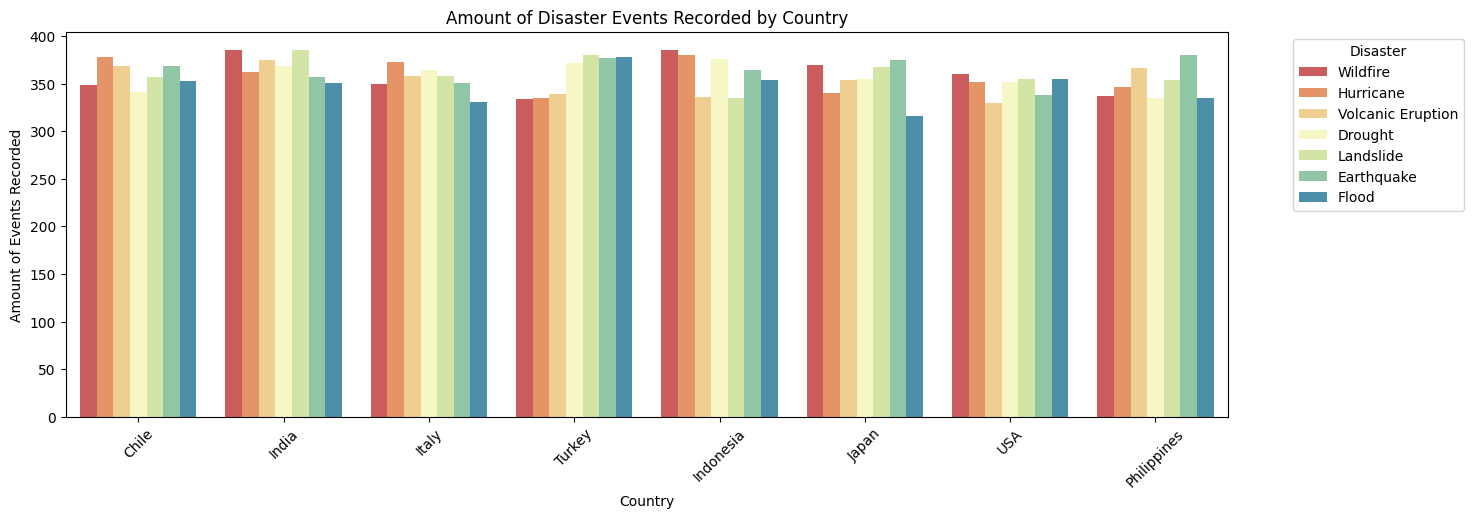

In [298]:
#Graficamos por pais tipo de evento registrado
plt.figure(figsize=(15,5))
sns.countplot(data=data_clean, x='location', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Country')
plt.xlabel('Country')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45);

There are 8 countries registered: Chile, India, Italia, Turkia, Indonesia, Japón, Estados Unidos y Filipinas.
All of them are affected by natural phenomena, registering at least 300 events since the first time a record was made: December 8, 2022 to December 7, 2025.

### Temporal Analysis
In this section we will examine whether:
- There was a year with more events than another?

- The types of disasters change depending on the time of year?

- There are months with a higher concentration of events?

- Which weeks have the highest number of recorded natural disasters?

In [299]:
#Merge between DF estaciones and data_clean
season_country = pd.merge(data_clean, estaciones, how='right', left_on=['location', 'month'], right_on=['location', 'month'])
season_country = season_country[[ 'location', 'disaster_type', 'season','month_name', 'week', 'year']]
display(season_country.sample(5))

,location,disaster_type,season,month_name,week,year
17108,USA,Drought,Autumn,octubre,41,2025
1921,Chile,Hurricane,Spring,octubre,42,2024
12348,Indonesia,Drought,Rainy,noviembre,47,2025
7546,Italy,Volcanic Eruption,Winter,diciembre,50,2022
10993,Indonesia,Flood,Dry,mayo,22,2024


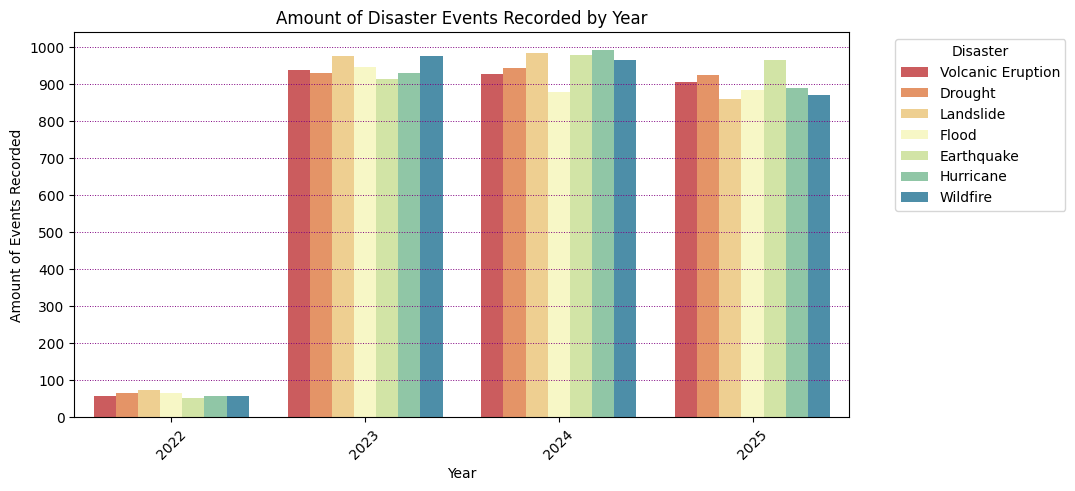

In [300]:
#We observe the distribution of events according to the years
plt.figure(figsize=(10,5))
sns.countplot(data=data_clean, x='year', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Year')
plt.xlabel('Year')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.yticks(range(0, 1100, 100))
plt.xticks(rotation=45);

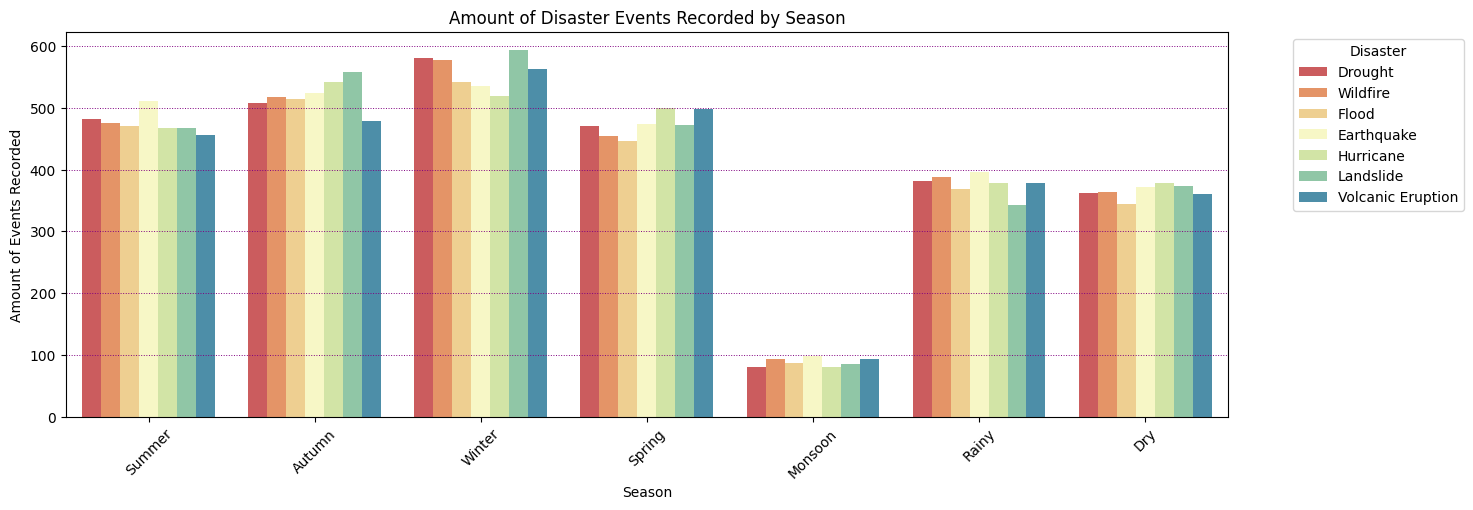

In [301]:
#We observe how different events look depending on the season of the year
season_country = season_country.sort_values(by='season', key=lambda x: pd.Categorical(x, categories=['Summer', 'Autumn', 'Winter', 'Spring'], ordered=True))
plt.figure(figsize=(15,5))
sns.countplot(data=season_country, x='season', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Season')
plt.xlabel('Season')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(rotation=45);    

Since the seasons of the year differ according to the geographical location of the country, we will observe how the recorded events are distributed according to the months.

In [302]:
#frequency of total events recorded per month
data_clean['month'] = data_clean['date'].dt.month
eventos_por_mes = data_clean.groupby('month')['disaster_type'].count().reset_index()
eventos_por_mes = eventos_por_mes.rename(columns={'disaster_type': 'event_count'})

#We add name according to the month number
eventos_por_mes['month_name'] = eventos_por_mes['month'].apply(lambda x: dt.datetime(2025, x, 1).strftime('%B'))
eventos_por_mes = eventos_por_mes.sort_values(by='month', key=lambda x: pd.Categorical(x, categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True))
display(eventos_por_mes)


,month,event_count,month_name
0,1,1637,January
1,2,1518,February
2,3,1659,March
3,4,1655,April
4,5,1701,May
5,6,1610,June
6,7,1787,July
7,8,1709,August
8,9,1703,September
9,10,1686,October


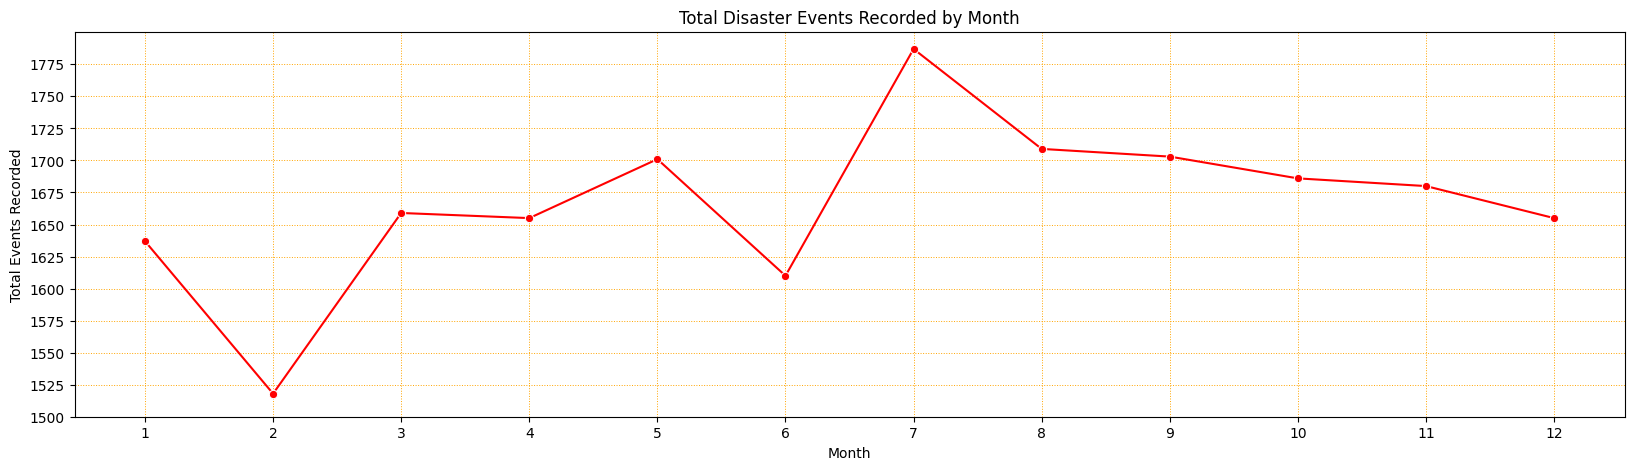

In [303]:
#We graphed the frequency of events per month
plt.figure(figsize=(20,5))
sns.lineplot(data=eventos_por_mes, x='month', y='event_count', marker='o', color='red')
plt.title('Total Disaster Events Recorded by Month')
plt.xlabel('Month')
plt.ylabel('Total Events Recorded')
plt.grid(axis='y', color='orange', linestyle=':', linewidth=0.7)
plt.grid(axis='x', color='orange', linestyle=':', linewidth=0.7)
plt.xticks(range(1, 13, 1))
plt.yticks(range(1500, 1800, 25));

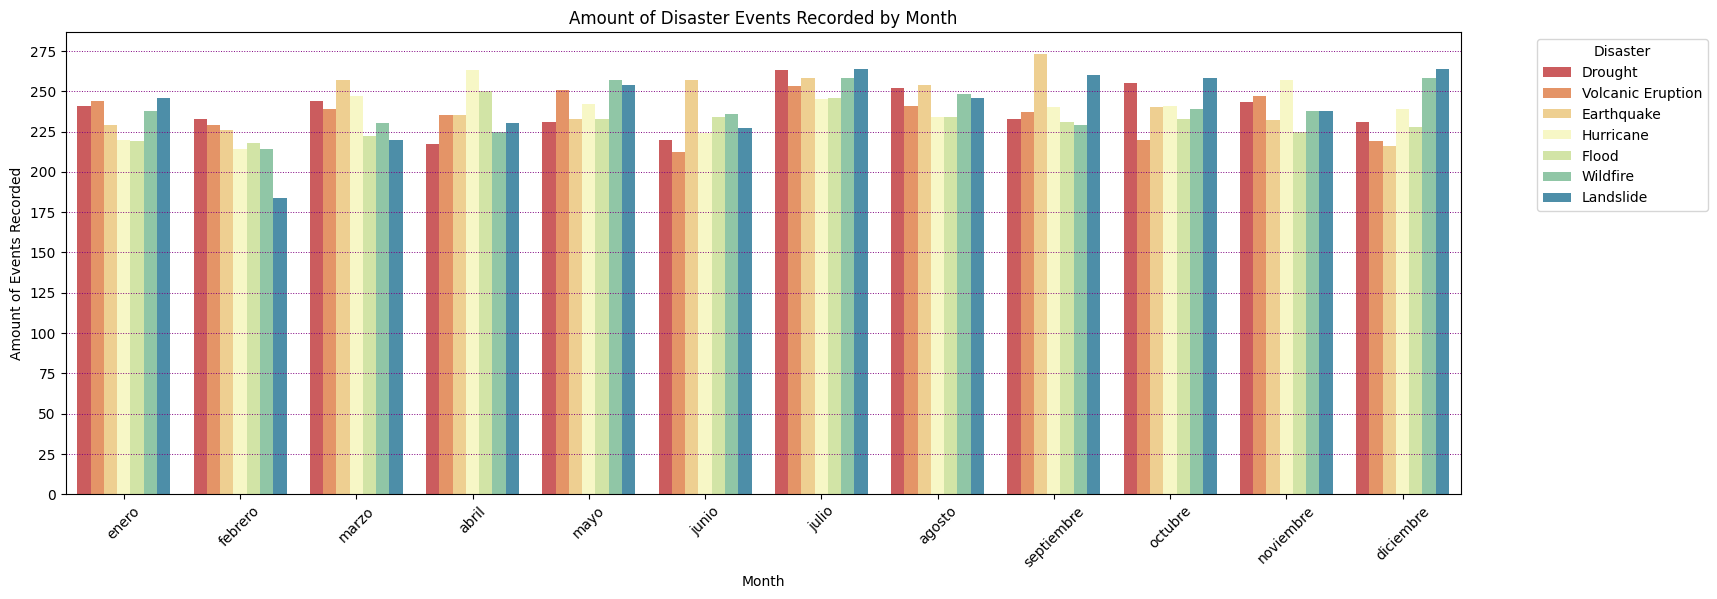

In [304]:
#We observe the distribution of events throughout the months of the year
season_country = season_country.sort_values(by='month_name', 
                                            key=lambda x: pd.Categorical(x, 
                                                                        categories=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'], 
                                                                        ordered=True))
plt.figure(figsize=(18,6))
sns.countplot(data=season_country, x='month_name', hue='disaster_type', palette='Spectral')
plt.title('Amount of Disaster Events Recorded by Month')
plt.xlabel('Month')
plt.ylabel('Amount of Events Recorded')
plt.legend(title='Disaster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(rotation=45)
plt.yticks(range(0, 300, 25));

In [305]:
#We calculate the number of events by type of disaster per week of the year
weekly_events = data_clean.groupby(['week','month'])['date'].count().reset_index()
weekly_events = weekly_events.rename(columns={'date': 'event_count'})

#Top 5 weeks with the most registered events
top_5_week = weekly_events.sort_values(by='event_count', ascending=False).head(5)
print('Top 5 semanas con más eventos registrados:')
display(top_5_week)

Top 5 semanas con más eventos registrados:


,week,month,event_count
38,30,7,436
63,49,12,434
14,12,3,428
36,28,7,425
49,39,9,421


2022 has fewer recorded events because records only began in December of that year, and 2025 is missing three weeks of data (the last three weeks).

Overall, no year stands out for having a higher number of recorded events.

The season with the highest number of events of all types is winter, followed by autumn, and the season with the fewest is monsoon.

The month with the fewest recorded natural phenomena is February, and the month with the highest number of events of all types is July.

The month with the highest number of each type of natural disaster:
- April: hurricanes.

- April: floods.

- May: volcanic eruptions.

- May, July, and December: fires.

- July: drought.

- September: earthquakes.

- December: avalanches/landslides.

Weeks with the highest number of natural disasters:
- 30 with 436.
- 49 with 434.
- 12 with 428.
- 28 with 425.
- 39 with 421.

### Geographic Analysis

In this section we will observe:
- Descending order of the countries most affected by the number of events.

- Top 10 countries and types of disasters, based on the number of events recorded.


Ranking of countries with the most recorded natural disasters in total:


,location,total_event_count
0,India,2583
1,Indonesia,2530
2,Chile,2515
3,Turkey,2515
4,Italy,2485
5,Japan,2477
6,Philippines,2453
7,USA,2442


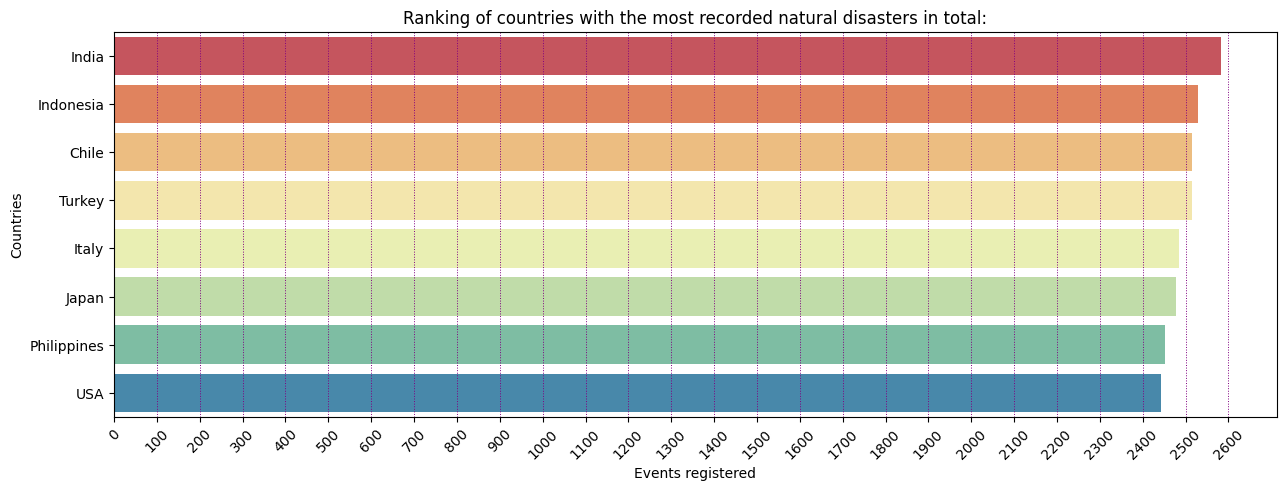

In [306]:
#Ranking of countries with the most recorded natural phenomena in total:
total_events = data_clean.groupby('location')['date'].count().reset_index()
total_events = total_events.rename(columns={'date': 'total_event_count'})
total_events = total_events.sort_values(by='total_event_count', ascending=False).reset_index(drop=True)
print('Ranking of countries with the most recorded natural disasters in total:')
display(total_events)

#Graph of the ranking of countries with the most recorded natural phenomena in total:
plt.figure(figsize=(15,5))
sns.barplot(data=total_events, x='total_event_count', y='location', palette='Spectral', hue='location')
plt.title('Ranking of countries with the most recorded natural disasters in total:')
plt.xlabel('Events registered')
plt.ylabel('Countries')
plt.grid(axis='x', color='purple', linestyle=':', linewidth=0.7)
plt.xticks(range(0, 2700, 100))
plt.xticks(rotation=45)
plt.show()

India, Indonesia, and Chile have the highest total number of registered events.
The United States has the lowest.

In [307]:
#We grouped them by country and by type of disaster and counted the number of events recorded.
country_type = data_clean.groupby(['location', 'disaster_type'])['date'].count().reset_index()
country_type = country_type.rename(columns={'date': 'event_count'})
print('Top 10 events registered by country and by type of disaster:')
display(country_type.sort_values(by='event_count', ascending=False).head(10))

Top 10 events registered by country and by type of disaster:


,location,disaster_type,event_count
20,Indonesia,Wildfire,385
11,India,Landslide,385
13,India,Wildfire,385
17,Indonesia,Hurricane,380
36,Philippines,Earthquake,380
46,Turkey,Landslide,380
3,Chile,Hurricane,378
44,Turkey,Flood,378
43,Turkey,Earthquake,377
14,Indonesia,Drought,376


### Analysis by Disaster Type

In this section we will observe:

- Which phenomenon is most recurrent in each country according to the records?

- Which disasters are most frequent in the overall records?

Most recurrent phenomenon by country:


,location,disaster_type,event_count
0,India,Landslide,385
1,Indonesia,Wildfire,385
2,Philippines,Earthquake,380
3,Turkey,Landslide,380
4,Chile,Hurricane,378
5,Japan,Earthquake,375
6,Italy,Hurricane,373
7,USA,Wildfire,360


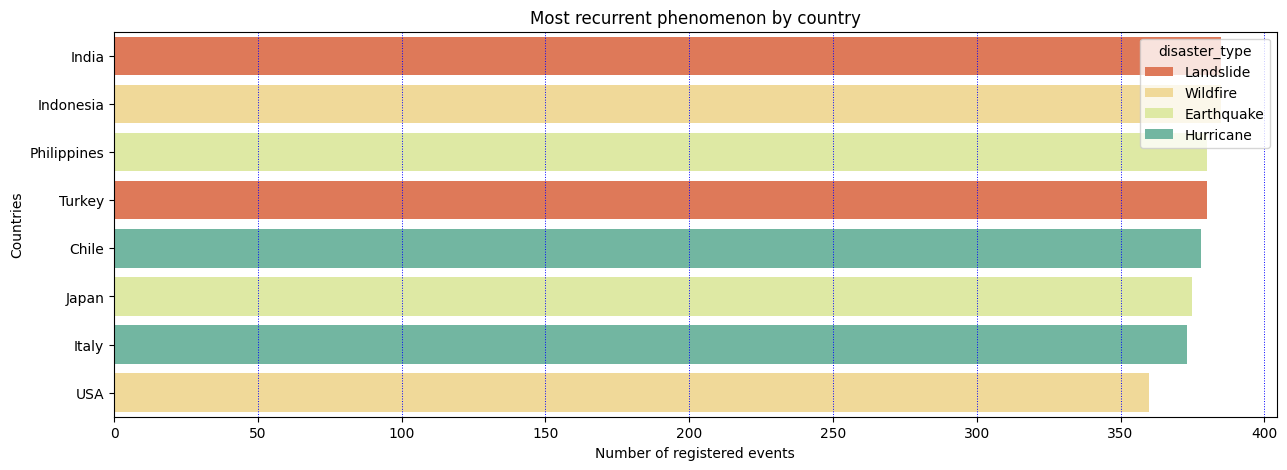

In [308]:
#We calculate the most recurrent phenomenon by country
country_fenomeno = country_type.loc[country_type.groupby('location')['event_count'].idxmax()][['location', 'disaster_type', 'event_count']]
country_fenomeno = country_fenomeno.sort_values(by='event_count', ascending=False).reset_index(drop=True)
print('Most recurrent phenomenon by country:')
display(country_fenomeno)

#Graph of the most recurrent phenomenon by country
plt.figure(figsize=(15,5))
sns.barplot(data=country_fenomeno, x='event_count', y='location', palette='Spectral', hue='disaster_type')
plt.title('Most recurrent phenomenon by country')
plt.xlabel('Number of registered events')
plt.ylabel('Countries')
plt.grid(axis='x', color='blue', linestyle=':', linewidth=0.7)
plt.show()

This can be observed in:
- India, there are more recorded landslides and drought.

- Indonesia, there are more recorded wildfires.

- The Philippines, there are more recorded earthquakes.

- Turkey, there are more recorded landslides.

- Chile, there are more recorded hurricanes.

- Japan, there are more recorded earthquakes.

- Italy, there are more recorded hurricanes.

- The United States, there are more recorded wildfires.

,disaster_type,event_count
0,Earthquake,2910
1,Landslide,2891
2,Wildfire,2870
3,Hurricane,2866
4,Drought,2863
5,Volcanic Eruption,2827
6,Flood,2773


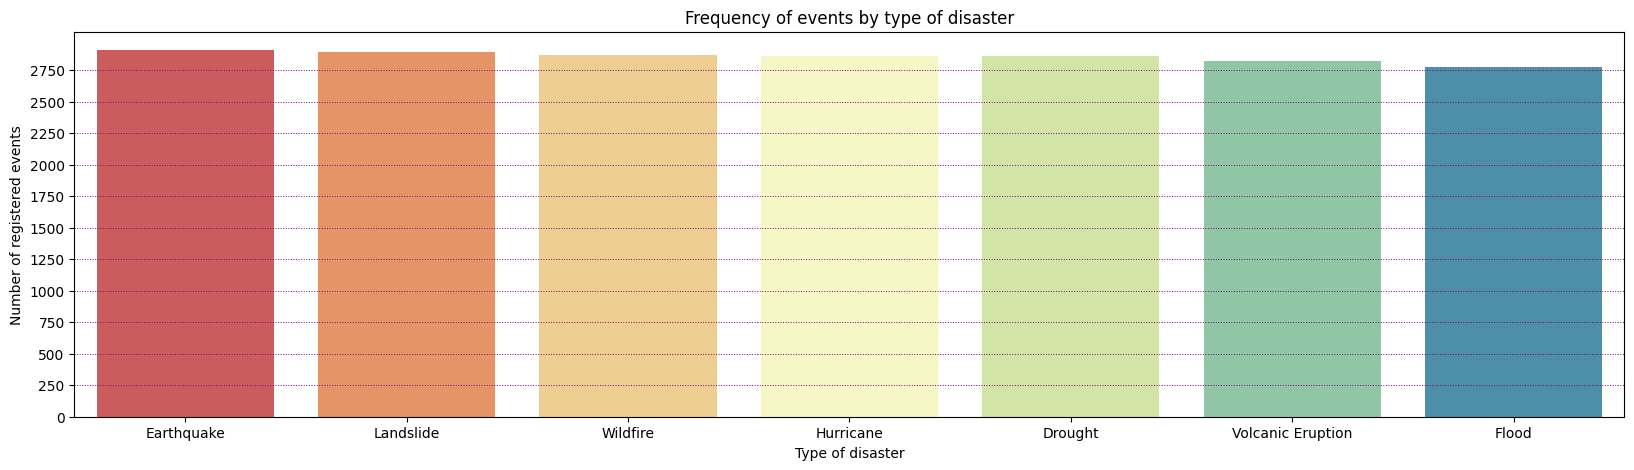

In [309]:
#We calculate the frequency of events by type of disaster
desastres_naturales = data_clean.groupby('disaster_type')['date'].count().reset_index()
desastres_naturales = desastres_naturales.rename(columns={'date': 'event_count'})
desastres_naturales = desastres_naturales.sort_values(by='event_count', ascending=False).reset_index(drop=True)
display(desastres_naturales)

#Graph of the frequency of events by type of disaster
plt.figure(figsize=(20, 5))
sns.barplot(data=desastres_naturales, x='disaster_type', y='event_count', palette='Spectral', hue='disaster_type')
plt.title('Frequency of events by type of disaster')
plt.xlabel('Type of disaster')
plt.ylabel('Number of registered events')
plt.grid(axis='y', color='purple', linestyle=':', linewidth=0.7)
plt.yticks(range(0, 3000, 250));

The difference in recorded events between earthquakes, which rank first, and floods, which rank last, is 137.

Earthquakes, landslides, and fires occupy the top three positions among regional disasters.

### Social Impact

In this section, we will examine how each disaster impacts the population. To do this, we will also use the "country_km2" dataset, which specifies the country's area in km² plus its registered population. This data will make it easier to determine the percentage of victims affected by this natural phenomenon.

Average Impact vs. Frequency

- Countries with many events but low average impact

- Countries with few events but high impact

- Difference between recurrence and severity

Impact by type of disaster:
- Which natural phenomenon generates the greatest social impact?

- Which generates the greatest economic impact?

We are going to merge the natural disasters dataset with the one that contains information about the population and square meters of the country.

In [310]:
#We merge the data of the disasters with the information of the countries to observe if there is any relationship between the number of events and the population or the size of the country.
paises_info = pd.merge(data_clean, paises, how='left', left_on='location', right_on='location')

paises_info = paises_info[['date','location', 'disaster_type', 'affected_population','population', 'severity_level',  'is_major_disaster', 'estimated_economic_loss_usd', 'km2',]]
display(paises_info.sample(5))

,date,location,disaster_type,affected_population,population,severity_level,is_major_disaster,estimated_economic_loss_usd,km2
3423,2025-06-11,Chile,Wildfire,12656,19603700,3,0,3246456.62,756096
6592,2024-05-10,Japan,Landslide,41117,123294513,7,1,3368362.50,377975
12688,2022-12-24,Indonesia,Hurricane,51145,279798049,9,1,7831139.72,1904569
19838,2024-04-23,Japan,Hurricane,33183,123294513,7,1,5134193.83,377975
16563,2023-06-23,Chile,Volcanic Eruption,33192,19603700,7,1,6288324.91,756096


In [311]:
#We calculate the percentage of the population affected by the disasters in each country
paises_info['%_affected_population'] = (paises_info['affected_population'] / paises_info['population']) * 100
display(paises_info.sample(5))

,date,location,disaster_type,affected_population,population,severity_level,is_major_disaster,estimated_economic_loss_usd,km2,%_affected_population
12316,2023-03-12,Philippines,Volcanic Eruption,4978,117337370,3,0,1117291.47,300000,0.004242
4544,2025-09-15,Italy,Drought,7466,58853482,1,0,2205357.16,301340,0.012686
19201,2023-12-10,Indonesia,Volcanic Eruption,13784,279798049,3,0,3460102.82,1904569,0.004926
8876,2023-03-04,Chile,Flood,15547,19603700,3,0,4184982.17,756096,0.079306
7647,2025-03-06,Japan,Landslide,15469,123294513,4,0,2576971.21,377975,0.012546


#### Average Impact vs Frequency

In [ ]:
#Countries with many events but low average impact

#

In [313]:
#Countries with few events but high impact

In [314]:
#Difference between recurrence and severity

#### Impact by type of disaster:

In [315]:
#What natural phenomenon generates the greatest social impact?

In [316]:
#Which ones generate the greatest economic impact.

In [317]:
#severity of events by type of disaster

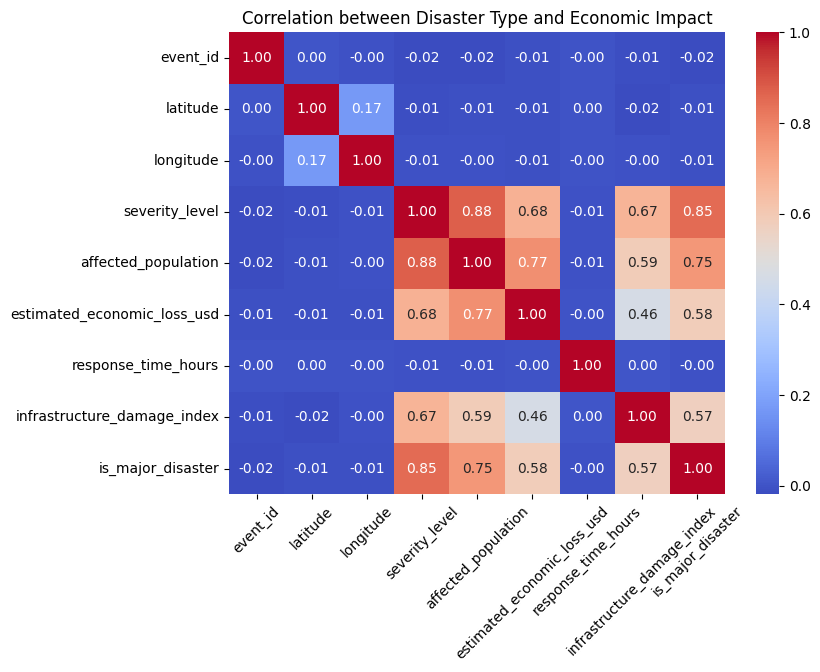

In [318]:
#We created a heatmap to observe the relationship between economic impact and type of disaster
cm = data_clean.select_dtypes(include=['int64', 'float64']).corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.title('Correlation between Disaster Type and Economic Impact')
plt.xticks(rotation=45);